In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
df = pd.read_csv('HepatitisCdata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [4]:
# Calculating the column averages for columns with null values and replacing them with the average of each column
column_averages = df.loc[:, df.isnull().any()].mean()

df.fillna(column_averages, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         615 non-null    float64
 5   ALP         615 non-null    float64
 6   ALT         615 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        615 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        615 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


# Data Cleaning and Inspections

In [6]:
# Inserting units of measurement after the column name 
col_units = {'ALB': 'g/dL',
              'ALP': 'IU/L',
              'ALT': 'IU/L',
              'AST': 'IU/L',
              'BIL': 'mg/dL',
              'CHE': 'U/L',
              'CHOL': 'mg/dL',
              'CREA': 'mg/dL',
              'GGT': 'IU/L',
              'PROT': 'g/dL'
              }

df = df.rename(columns={col: f"{col} ({col_units.get(col, '')})" if col not in ['Category', 'Age', 'Sex'] else col for col in df.columns})

In [7]:
df.head()

,Unnamed: 0 (),Category,Age,Sex,ALB (g/dL),ALP (IU/L),ALT (IU/L),AST (IU/L),BIL (mg/dL),CHE (U/L),CHOL (mg/dL),CREA (mg/dL),GGT (IU/L),PROT (g/dL)
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [8]:
#Printing the age of every numerical value
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    col_min = df[column].min()
    col_max = df[column].max()
    print(f"Smallest value in {column}: {col_min}")
    print(f"Largest value in {column}: {col_max}")
    print()

Smallest value in Unnamed: 0 (): 1
Largest value in Unnamed: 0 (): 615

Smallest value in Age: 19
Largest value in Age: 77

Smallest value in ALB (g/dL): 14.9
Largest value in ALB (g/dL): 82.2

Smallest value in ALP (IU/L): 11.3
Largest value in ALP (IU/L): 416.6

Smallest value in ALT (IU/L): 0.9
Largest value in ALT (IU/L): 325.3

Smallest value in AST (IU/L): 10.6
Largest value in AST (IU/L): 324.0

Smallest value in BIL (mg/dL): 0.8
Largest value in BIL (mg/dL): 254.0

Smallest value in CHE (U/L): 1.42
Largest value in CHE (U/L): 16.41

Smallest value in CHOL (mg/dL): 1.43
Largest value in CHOL (mg/dL): 9.67

Smallest value in CREA (mg/dL): 8.0
Largest value in CREA (mg/dL): 1079.1

Smallest value in GGT (IU/L): 4.5
Largest value in GGT (IU/L): 650.9

Smallest value in PROT (g/dL): 44.8
Largest value in PROT (g/dL): 90.0



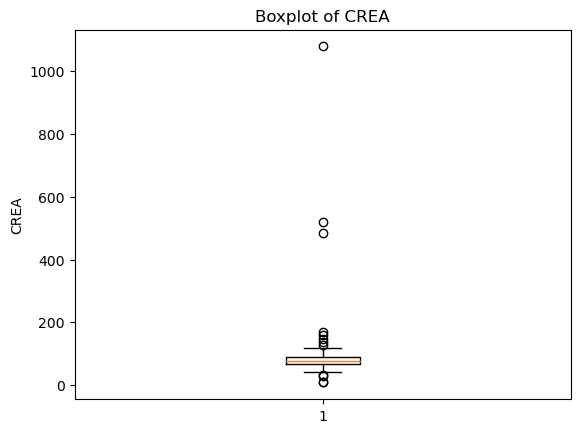

In [9]:
# CREA inspection
plt.boxplot(df['CREA (mg/dL)'])
plt.title('Boxplot of CREA')
plt.ylabel('CREA')
plt.show()

In [10]:
df = df.drop(df[df['CREA (mg/dL)'] > 400].index)

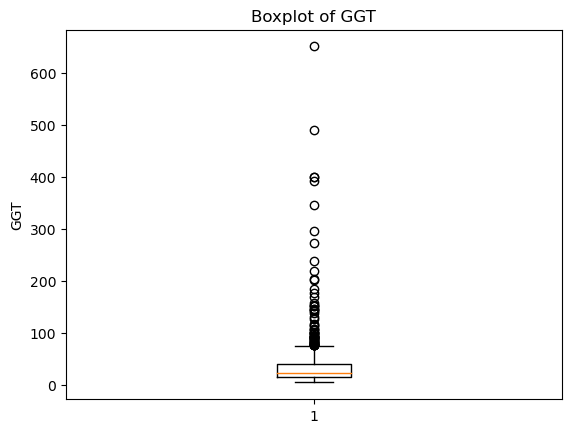

In [11]:
plt.boxplot(df['GGT (IU/L)'])
plt.title('Boxplot of GGT')
plt.ylabel('GGT')
plt.show()

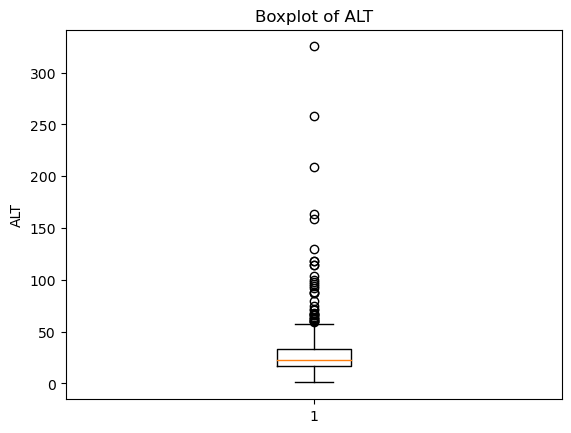

In [12]:
plt.boxplot(df['ALT (IU/L)'])
plt.title('Boxplot of ALT')
plt.ylabel('ALT')
plt.show()

In [13]:
df = df.drop(df[df['ALT (IU/L)'] > 200].index)

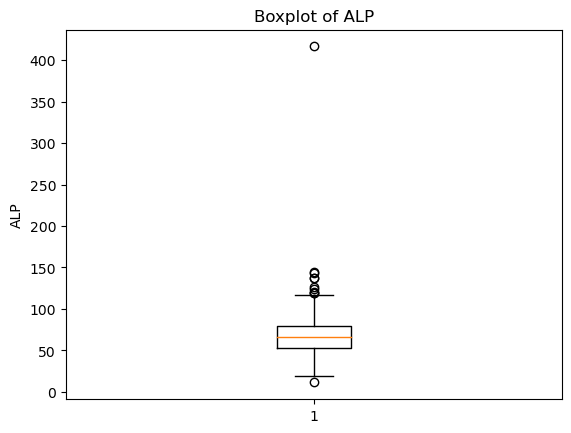

In [14]:
plt.boxplot(df['ALP (IU/L)'])
plt.title('Boxplot of ALP')
plt.ylabel('ALP')
plt.show()

In [15]:
df = df.drop(df[df['ALP (IU/L)'] > 200].index)

In [16]:
# Combining Blood Donor and Probable Blood Donor
df['Category'] = df['Category'].replace({'0s=suspect Blood Donor': '0=Blood Donor'})

In [17]:
df.head()

,Unnamed: 0 (),Category,Age,Sex,ALB (g/dL),ALP (IU/L),ALT (IU/L),AST (IU/L),BIL (mg/dL),CHE (U/L),CHOL (mg/dL),CREA (mg/dL),GGT (IU/L),PROT (g/dL)
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [18]:
# Experienced problems removing the unnamed column
df.drop(df.columns[df.columns.str.contains('Unnamed')], axis=1, inplace=True)


In [19]:
df['Category'].value_counts()

0=Blood Donor    538
3=Cirrhosis       26
1=Hepatitis       24
2=Fibrosis        20
Name: Category, dtype: int64

In [20]:
#Label encoding category columns. 1 = Liver Complication
category_label_maping = {'1=Hepatitis':1,'2=Fibrosis':1,'3=Cirrhosis': 1}

df['Category'] = df['Category'].map(category_label_maping).fillna(0).astype(int)

In [21]:
df['Sex'] = df['Sex'].replace({'m': 1, 'f': 0}).astype(int)

In [22]:
df.head()

,Category,Age,Sex,ALB (g/dL),ALP (IU/L),ALT (IU/L),AST (IU/L),BIL (mg/dL),CHE (U/L),CHOL (mg/dL),CREA (mg/dL),GGT (IU/L),PROT (g/dL)
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [25]:
positive_df = df[df['Category'] == 1]

In [32]:
positive_df.head(30)

,Category,Age,Sex,ALB (g/dL),ALP (IU/L),ALT (IU/L),AST (IU/L),BIL (mg/dL),CHE (U/L),CHOL (mg/dL),CREA (mg/dL),GGT (IU/L),PROT (g/dL)
540,1,38,1,45.0,56.30000,28.450814,33.1,7.0,9.58,6.00,77.9,18.9,63.0
541,1,19,1,41.0,68.28392,87.000000,67.0,12.0,7.55,3.90,62.0,65.0,75.0
542,1,23,1,47.0,19.10000,38.900000,164.2,17.0,7.09,3.20,79.3,90.4,70.1
543,1,25,1,42.0,38.20000,63.300000,187.7,14.0,6.00,4.28,66.9,40.2,70.5
544,1,27,1,45.0,27.50000,10.500000,37.8,10.0,8.77,3.20,55.2,35.9,74.5
545,1,29,1,49.0,68.28392,53.000000,39.0,15.0,8.79,3.60,79.0,37.0,90.0
546,1,30,1,45.0,68.28392,66.000000,45.0,14.0,12.16,6.10,86.0,43.0,77.0
547,1,32,1,45.0,34.60000,44.300000,96.2,16.0,10.11,6.28,81.2,48.1,82.1
548,1,32,1,41.0,34.40000,12.100000,60.9,6.0,13.80,5.48,45.4,33.1,71.1
549,1,34,1,46.0,36.70000,7.400000,31.6,9.0,9.71,5.37,82.3,34.4,71.6


In [31]:
positive_df['Sex'].value_counts()

1    50
0    20
Name: Sex, dtype: int64

In [23]:
df['Category'].value_counts()

0    538
1     70
Name: Category, dtype: int64

In [24]:
df.drop(['CREA (mg/dL)'], axis=1, inplace=True)

# Modeling

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 614
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      608 non-null    int64  
 1   Age           608 non-null    int64  
 2   Sex           608 non-null    int64  
 3   ALB (g/dL)    608 non-null    float64
 4   ALP (IU/L)    608 non-null    float64
 5   ALT (IU/L)    608 non-null    float64
 6   AST (IU/L)    608 non-null    float64
 7   BIL (mg/dL)   608 non-null    float64
 8   CHE (U/L)     608 non-null    float64
 9   CHOL (mg/dL)  608 non-null    float64
 10  GGT (IU/L)    608 non-null    float64
 11  PROT (g/dL)   608 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 61.8 KB


In [26]:
X = df.drop('Category', axis=1)
y = df['Category']

# Split the data into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [27]:
lr = LogisticRegression(max_iter=700)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=700)

In [28]:
lr_y_pred = lr.predict(X_test)

In [38]:
# Exporting the predictive model
import joblib

joblib.dump(lr, '/Users/dylanskalman/Downloads/Data_Science_Projects/Hepatitis C Prediction/predictions_app/model.joblib')

['/Users/dylanskalman/Downloads/Data_Science_Projects/Hepatitis C Prediction/predictions_app/model.joblib']

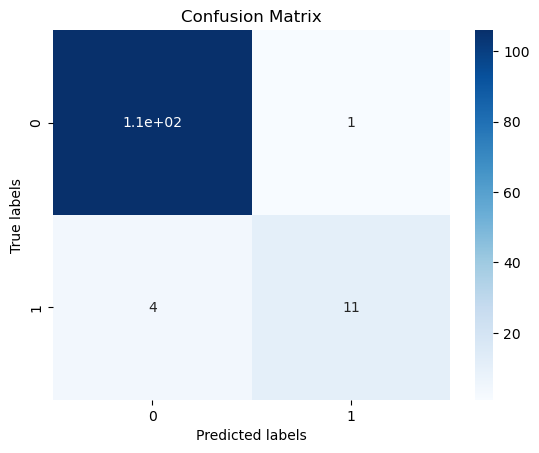

Logistic Regression Model Evaluation
Accuracy: 0.9590163934426229
Precision: 0.9166666666666666
Recall: 0.7333333333333333
F1 Score: 0.8148148148148148


In [31]:
cm1 = confusion_matrix(y_test, lr_y_pred)

# Plot confusion matrix of cm
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Metrics
print("\033[1m\033[4mLogistic Regression Model Evaluation\033[0m")
print('Accuracy:', accuracy_score(y_test, lr_y_pred))
print('Precision:', precision_score(y_test, lr_y_pred))
print('Recall:', recall_score(y_test, lr_y_pred))
print('F1 Score:', f1_score(y_test, lr_y_pred))

## Decision Tree

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
dt_y_pred = dt.predict(X_test)

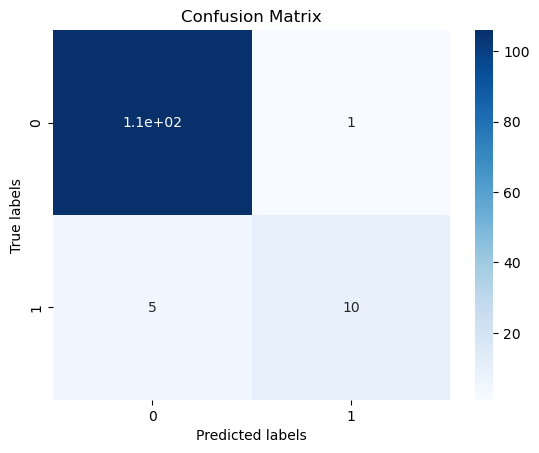

Decision Tree Model Evaluation
Accuracy: 0.9508196721311475
Precision: 0.9090909090909091
Recall: 0.6666666666666666
F1 Score: 0.7692307692307692


In [34]:
cm2 = confusion_matrix(y_test, dt_y_pred)

# Plot confusion matrix of cm
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Metrics
print("\033[1m\033[4mDecision Tree Model Evaluation\033[0m")
print('Accuracy:', accuracy_score(y_test, dt_y_pred))
print('Precision:', precision_score(y_test, dt_y_pred))
print('Recall:', recall_score(y_test, dt_y_pred))
print('F1 Score:', f1_score(y_test, dt_y_pred))

## Random Forest

In [35]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
rf_y_pred = rf.predict(X_test)

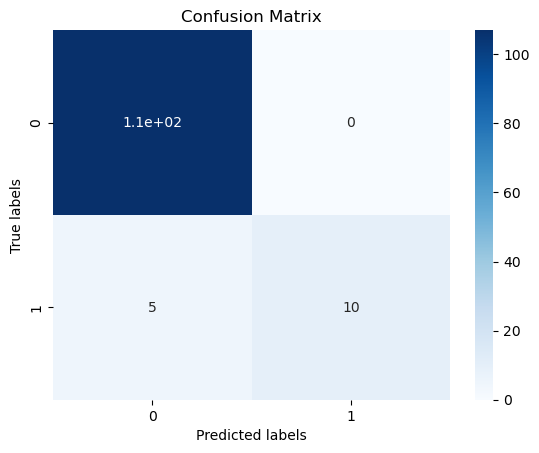

Random Forest Model Evaluation
Accuracy: 0.9590163934426229
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8


In [37]:
cm3 = confusion_matrix(y_test, rf_y_pred)

# Plot confusion matrix of cm
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Metrics
print("\033[1m\033[4mRandom Forest Model Evaluation\033[0m")
print('Accuracy:', accuracy_score(y_test, rf_y_pred))
print('Precision:', precision_score(y_test, rf_y_pred))
print('Recall:', recall_score(y_test, rf_y_pred))
print('F1 Score:', f1_score(y_test, rf_y_pred))